# Проектирование фильтра
[Источник](https://ru.dsplib.org/content/filter_butter_ap/filter_butter_ap.html)

![](FilterBatterWort.png)

In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
"""Зададим основные параметры:
частота дискретизации, частота пропускания, частота подавления в Гц"""

f_d = 0.5 # Частота дискретизации
f_p = 0.05 # Частота пропускания (pass)
f_s = 0.15 # Частота подавления (stop)

dt = 1/f_d # период дискретизации (в секундах)

# Круговые частоты, нормированные к частоте дискретизации
w_p = 2 * np.pi * f_p / f_d
w_s = 2 * np.pi * f_s / f_d

In [9]:
"""Зададим неоднородности в полосе подавления и в полосе запирания в дБ"""
R_p = 1 #подавление сигнала в полосе пропускания (не более, чем...)
R_s = 30 #подавление сигнала в полосе подавления (не менее, чем...)

In [10]:
"""Функция преобразования частоты цифрового фильтра в аналоговый"""
def F_DigitToAnalog(f_digital, f_d):
    f_analog = (f_d / np.pi) * np.tan(np.pi * f_digital/f_d)
    return f_analog

In [37]:
"""Частоты аналогового фильтра"""
F_p = F_DigitToAnalog(f_p, f_d)
F_s = F_DigitToAnalog(f_s, f_d)

In [43]:
"""Потери в полосе пропускания и заграждения"""
eps_p = np.sqrt(10**(R_p/10)-1)
eps_s = np.sqrt(10**(R_s/10)-1)

In [44]:
"""Расчёт порядка фильтра"""
N = np.log(eps_s/eps_p)/np.log(F_s/F_p)

#Округлим результат вверх
N = np.ceil(N)

In [45]:
"""Рассчитаем число полюсов фильтра"""

#Определим, чётный или нечётный порядок фильтра для определения количества парных полюсов и наличия центрального
r = N % 2
L = (N - r) / 2 #Число пар полюсов (комплексно сопряжённых полюсов)

2*L+r==N # Число полюсов совпало

True

In [117]:
"""Расчёт полюсов"""
def Poles(r:int, L:int, eps_p):
    N = int(2 * L + r)
    # "Радиус" размещения полюсов на эквивалентной p-плоскости
    alpha = eps_p ** (-1/(N))
    P = np.zeros(N, dtype=complex)

    if (r!=0):
        P[0] = -alpha
    
    Theta = np.zeros(L)
    dTheta = np.pi/N
    for i in range(1, L+1):
        Theta[i-1] = dTheta * (i - 0.5)
    
    for i in range(r, N, 2):
        P[i] = alpha * (-np.sin(Theta[(i-r)//2]) + 1j * np.cos(Theta[(i-r)//2]))
        P[i+1] = alpha * (-np.sin(Theta[(i-r)//2]) - 1j * np.cos(Theta[(i-r)//2]))

    return (alpha, P)

(alpha, P) = Poles(int(r), int(L), eps_p)
re_P = np.real(P)
im_P = np.imag(P)

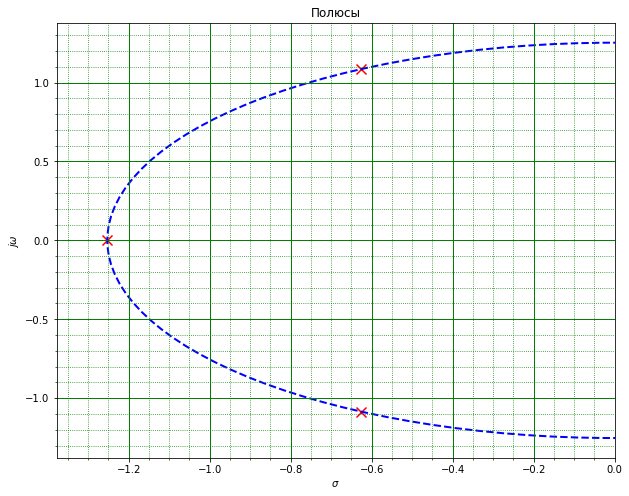

In [150]:
fig, ax = plt.subplots(1,1,figsize=(10, 8))#, dpi=200)
ax.scatter(re_P, im_P, s = 100, c = 'r', marker='x')

ax.grid()
ax.set_xlim([-1.1*alpha,0])
ax.set_ylim([-1.1*alpha, 1.1*alpha])
ax.set_xlabel('$\sigma$')
ax.set_ylabel('$j\omega$')
ax.minorticks_on()
ax.grid(which='major', color = 'green', linewidth = 1)
ax.grid(which='minor', color = 'green', linestyle = ':')
ax.set_title("Полюсы");

from matplotlib.patches import Ellipse
ax.add_patch(Ellipse(xy=(0, 0), width=2*alpha, height=2*alpha, edgecolor='b', fc='None', lw=2, ls='--'));

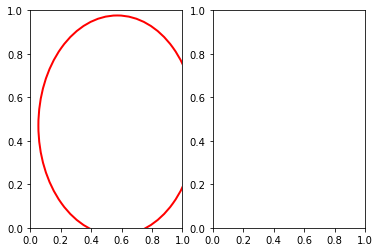

In [142]:
# fig, ax = plt.subplots(1,2)
# ax[0].add_patch(Ellipse(xy=(0.5718, 0.4705), width=1.036, height=1.012, 
#                         edgecolor='r', fc='None', lw=2));